In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\htran\Downloads\colors.csv')
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [2]:
df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [3]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [4]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [5]:
df1 = pd.read_csv(r'C:\Users\htran\Downloads\sets.csv')
df1.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


oldest lego 

In [7]:
oldest = df1.sort_values('year')
oldest.head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
oldest.loc[9521]

number of products in first year

In [9]:
oldest.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [10]:
oldest.head(10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


In [15]:
oldest[oldest['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


top 5 lego sets with most numbers of parts

In [12]:
parts = df1.sort_values('num_parts',ascending=False)
parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [16]:
import matplotlib.pyplot as plt

In [19]:
set_by_year = oldest.groupby('year').count()
set_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


Number of diff themes per calendar year, group data by year, then count number of unique theme id for that year

In [35]:
themes = oldest.groupby('year').agg({'theme_id': pd.Series.nunique})

In [37]:
themes.rename(columns={'theme_id':'num_themes'}, inplace=True)
themes.head()

,num_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


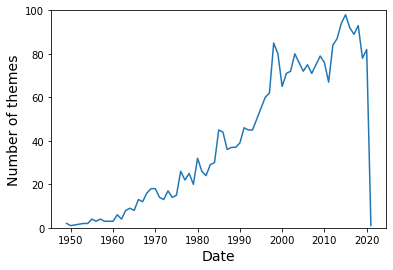

In [41]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of themes', fontsize=14)
plt.ylim(0, 100)
plt.plot(themes.index, themes.num_themes)

exclude 2020 and 2021

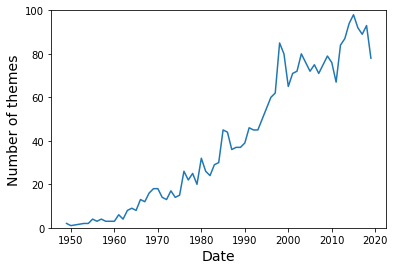

In [43]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of themes', fontsize=14)
plt.ylim(0, 100)
plt.plot(themes.index[:-2], themes.num_themes[:-2])

Two separate axes

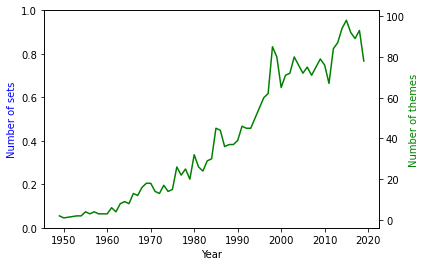

In [50]:
ax1 = plt.gca() # current axes
ax2 = ax1.twinx() # create another axe that shares the same x-axis
#ax1.plot(set_by_year.index[:-2])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='blue')
ax2.set_ylabel('Number of themes', color='green')
ax2.plot(themes.index[:-2], themes.num_themes[:-2],color='green')

Average num of parts per set in each year

In [55]:
avg_part_per_set = oldest.groupby('year').agg({'num_parts': pd.Series.mean})
avg_part_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


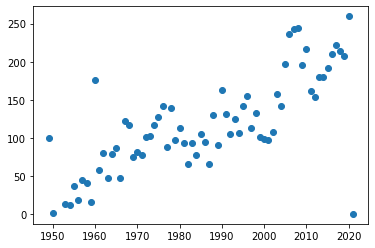

In [56]:
plt.scatter(avg_part_per_set.index, avg_part_per_set.num_parts)

Themes

In [57]:
df2 = pd.read_csv(r'C:\Users\htran\Downloads\themes.csv')
df2.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [58]:
df2[df2.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [59]:
df1[df1.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Merge data frame

In [61]:
set_theme_count = df1['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [62]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [63]:
merge = pd.merge(set_theme_count, df2, on='id')
merge[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

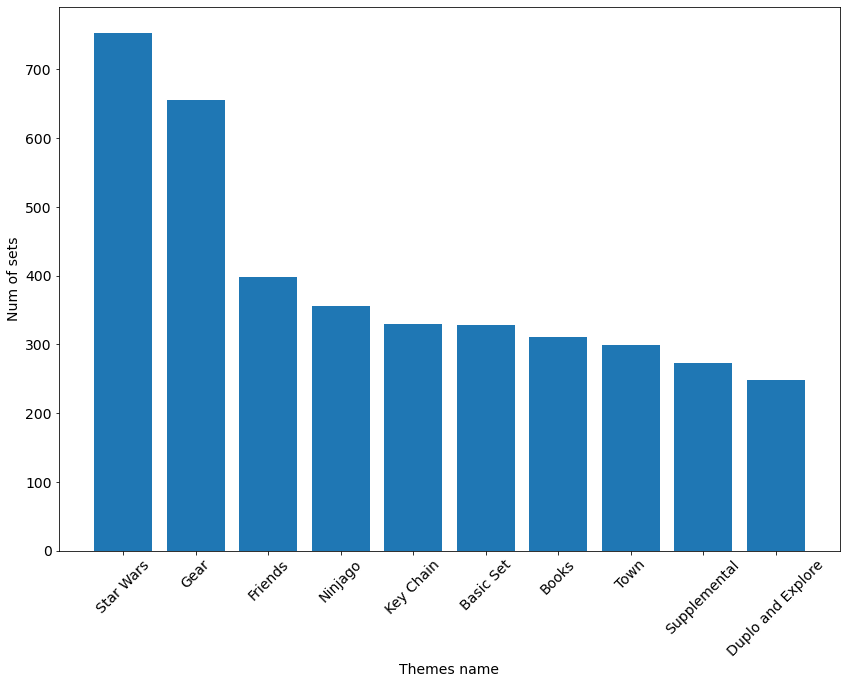

In [67]:
plt.figure(figsize=(14,10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Num of sets', fontsize=14)
plt.xlabel('Themes name', fontsize=14)
plt.bar(merge.name[:10], merge.set_count[:10])